In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Reading a GeoPackage file
input_file = "kontur_historical_population_density_for_2020_IN_20230621.gpkg"
data = gpd.read_file(input_file)
data.plot(figsize=(6, 6))
plt.show()

DriverError: kontur_historical_population_density_for_2020_IN_20230621.gpkg: No such file or directory

In [2]:
!pip install geopandas


In [3]:
!pip install contextily

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Reading a GeoPackage file
input_file = "kontur_population_20220630_r4.gpkg"
data = gpd.read_file(input_file)


CRSError: Invalid projection: epsg:3857: (Internal Proj Error: proj_create: SQLite error on SELECT name, coordinate_system_auth_name, coordinate_system_code, geodetic_crs_auth_name, geodetic_crs_code, conversion_auth_name, conversion_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM projected_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

In [5]:
import contextily as cx

In [8]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
df = data.to_crs(epsg=4326)
print(df.crs)
df.head()

EPSG:4326


,h3,population,geometry
0,8864e6ceddfffff,189,"POLYGON ((93.04213 13.23463, 93.04248 13.23986..."
1,8864e6ced9fffff,50,"POLYGON ((93.03695 13.22707, 93.03730 13.23230..."
2,8864e6ced1fffff,4,"POLYGON ((93.03283 13.23520, 93.03318 13.24042..."
3,8864e6cecbfffff,666,"POLYGON ((93.05143 13.23406, 93.05179 13.23929..."
4,8864e6cec3fffff,133,"POLYGON ((93.04731 13.24219, 93.04766 13.24742..."


In [ ]:
!pip uninstall geopandas


<AxesSubplot:>

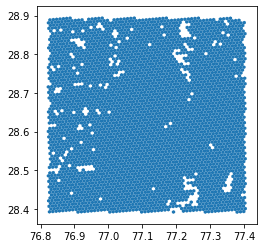

In [19]:
DELHI_MIN_LAT = 28.3968
DELHI_MAX_LAT = 28.8886 
DELHI_MIN_LONG = 77.397574
DELHI_MAX_LONG = 76.8281 

# Filter data for the region near Delhi
delhi_region = data.cx[DELHI_MIN_LONG:DELHI_MAX_LONG, DELHI_MIN_LAT:DELHI_MAX_LAT]

delhi_region.plot()


In [20]:
df_wm = delhi_region.to_crs(epsg = 3857)

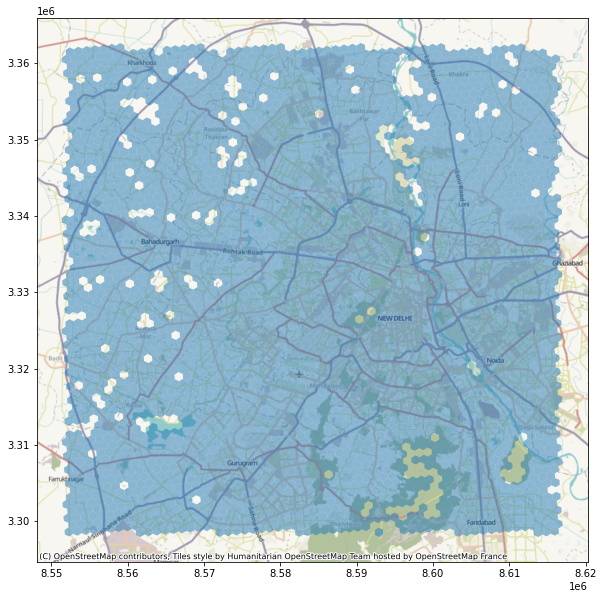

In [21]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5)
cx.add_basemap(ax)

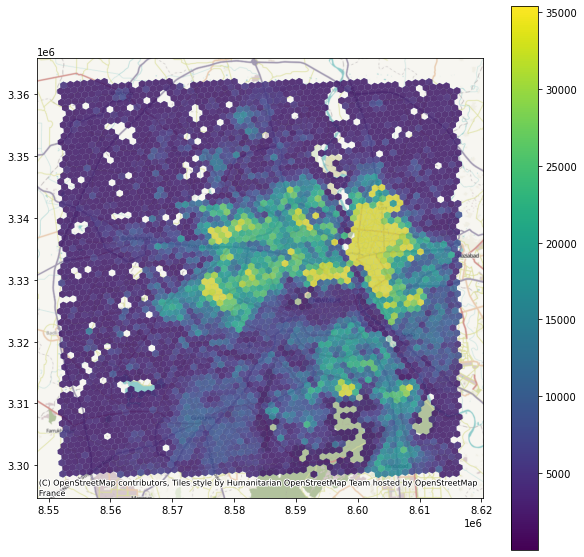

In [33]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5)
df_wm.plot(column='population', cmap='viridis', legend=True,alpha=0.7, ax=ax)

# Adding a basemap
cx.add_basemap(ax)

# Display the plot
plt.show()